In [4]:
cd ../Inputs

/scratch/work/courses/CHEM-GA-2671-2023fa/students/sea438/comp-lab-class-2023/Week5/Inputs


In [5]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load trajectory and topology files
traj = md.load('adp.trr', top='adp.gro')


In [39]:
phi_indices, phi_angles = md.compute_phi(traj)
psi_indices, psi_angles = md.compute_psi(traj)

time=traj.time

Text(0, 0.5, 'Psi Angle (radians)')

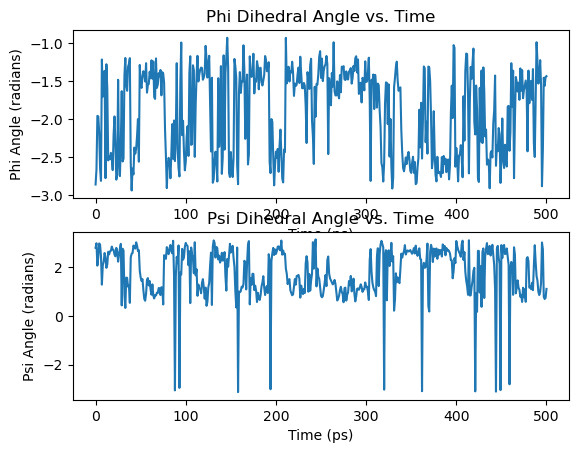

In [40]:
import matplotlib.pyplot as plt

# Create a time array (assuming you have the time information in your trajectory)
time = traj.time

plt.subplot(2, 1, 1)
plt.plot(time, phi_angles)
plt.title('Phi Dihedral Angle vs. Time')
plt.xlabel('Time (ps)')
plt.ylabel('Phi Angle (radians)')

# Create a plot for psi vs. time
plt.subplot(2, 1, 2)
plt.plot(time, psi_angles)
plt.title('Psi Dihedral Angle vs. Time')
plt.xlabel('Time (ps)')
plt.ylabel('Psi Angle (radians)')



In [34]:
print(type(psi_angles))
print(len(psi_angles))

print(type(phi_angles))
print(len(phi_angles))

<class 'numpy.ndarray'>
501
<class 'numpy.ndarray'>
501


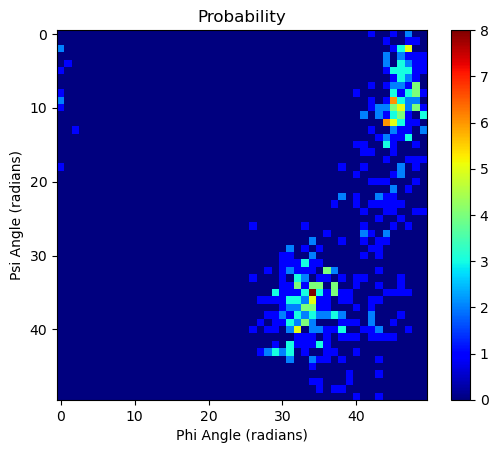

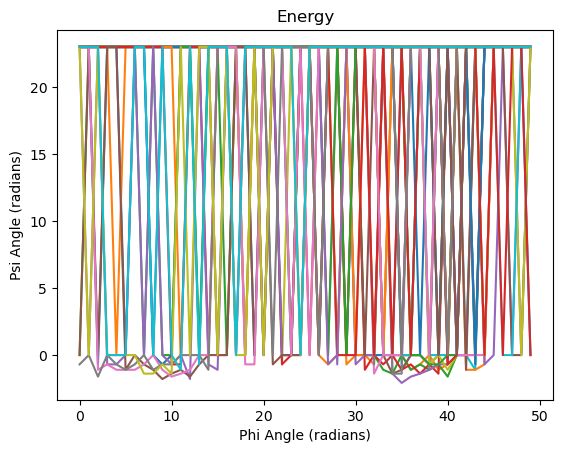

In [55]:
phi_angles=np.transpose(phi_angles)
phi_angles=phi_angles[:]

psi_angles=np.transpose(psi_angles)
psi_angles=psi_angles[:]

bins_x = np.linspace(min(phi_angles), max(phi_angles), 50)
bins_y = np.linspace(min(psi_angles), max(psi_angles), 50)

# Calculate the 2D histogram
hist, x_edges, y_edges = np.histogram2d(phi_angles, psi_angles,bins=(50,50))
#Plot 2d hist
plt.imshow(hist, cmap=plt.cm.jet)
plt.colorbar()
plt.xlabel('Phi Angle (radians)')
plt.ylabel('Psi Angle (radians)')
plt.title('Probability')
plt.imshow(hist, cmap=plt.cm.jet)

#Free energy surface
fig1, ax1 = plt.subplots()
F= -np.log(hist+1e-10)
ax1.set_title('Energy')
ax1.set_xlabel('Phi Angle (radians)')
ax1.set_ylabel('Psi Angle (radians)')
ax1.plot(F)